# Space Exploration
This project looks into all the rocket launches since the start of space mission in 1957. Data is taken from Kaggle and scraped from Next Space Flight website. Links to the sources are below:
* https://www.kaggle.com/agirlcoding/all-space-missions-from-1957
* https://nextspaceflight.com/launches/past/?page=1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

## A. Exploratory Data Analysis: Statistics

In [31]:
df = pd.read_csv('Space_Corrected.csv', low_memory=False, parse_dates=['Datum'])
df.head()

,Unnamed: 0,Unnamed: 0.1,Company Name,Location,Datum,Detail,Status Rocket,Rocket,Status Mission
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [4]:
df.shape

(4324, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      4324 non-null   int64 
 1   Unnamed: 0.1    4324 non-null   int64 
 2   Company Name    4324 non-null   object
 3   Location        4324 non-null   object
 4   Datum           4324 non-null   object
 5   Detail          4324 non-null   object
 6   Status Rocket   4324 non-null   object
 7    Rocket         964 non-null    object
 8   Status Mission  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [7]:
df.isna().sum()

Unnamed: 0           0
Unnamed: 0.1         0
Company Name         0
Location             0
Datum                0
Detail               0
Status Rocket        0
 Rocket           3360
Status Mission       0
dtype: int64

#### Statistics:
* Data dimensions: There are 4324 instances and 9 attributes in the data.
* Data types: Most of the data are in object data type.
    - `Object` : 7
    - `int64` : 2
* Columns `Unnamed: 0` and `Unnamed: 0.1` contains numerical values which are identical to the index. These two columns will be dropped as they are not needed in data analysis.
* Column ` Rocket` which indicated the cost of the mission has 3360 missing values. It will be dropped and will not be included.

## Data Cleaning

* A new dataframe, `space_df`, will be created after dropping the following attributes: `Unnamed: 0`, `Unnamed: 0.1' and 'Rocket'.
* A new attribute, `Country`, will be created and derived from `Location` column.

In [32]:
# Remove the following columns: Unnamed: 0, Unnamed: 0.1, Rocket
space_df = df.drop(['Unnamed: 0','Unnamed: 0.1',' Rocket'],axis=1,inplace=True)
space_df = pd.DataFrame(df)

In [33]:
space_df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Status Mission
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,Success


In [34]:
# Create a country column
space_df['Country'] = space_df['Location'].apply(lambda x:x.split()[-1])
space_df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Status Mission,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success,China
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,Success,USA


In [35]:

datetimes = pd.to_datetime(space_df['Datum'], utc=True)
space_df['LaunchYear'] = datetimes.dt.year
space_df.head()

,Company Name,Location,Datum,Detail,Status Rocket,Status Mission,Country,LaunchYear
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,Success,USA,2020
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,Success,China,2020
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,Success,USA,2020
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,Success,Kazakhstan,2020
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,Success,USA,2020


## Data Visualization - Total Rocket Launches
Below figures visualize the total rocket missions carried out from 1957 taking into account how many of these launches are successful. This will also look into the number of rockets that are currently active and retired. The plots are irrespective of countries and company.
* On average, there are around 67 rocket missions yearly. The height of space exploration is at its peak between 1965 and 1978, when at least 80 rockets were launched into the space each year. The same trend is being seen during the last five years.
* Majority of the rocket missions are successful. Below are the statistics:
    - Success: 3879
    - Failure: 339
    - Partial Failure: 102
    - Premature Failure: 4
* At the moment, there are 790 active rockets. This comprise around 18.3% of the total rockets launched since 1957.

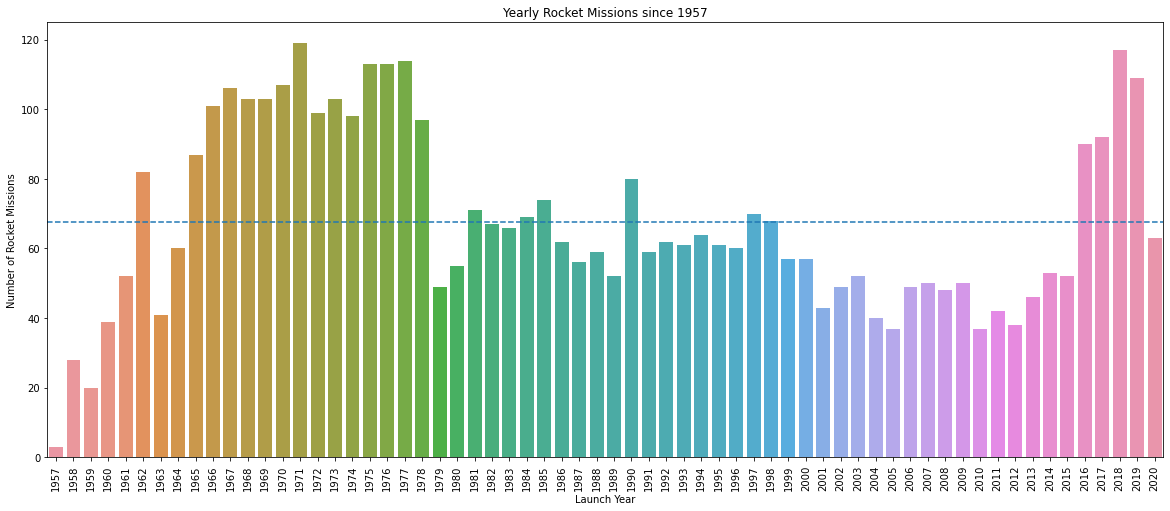

In [36]:
# Yearly rocket missions

plt.figure(figsize=(20,8))
fig = sns.countplot(x="LaunchYear", data=space_df)
fig.set(title='Yearly Rocket Missions since 1957',
       xlabel = 'Launch Year',
       ylabel = 'Number of Rocket Missions');
plt.xticks(rotation='vertical');
fig.axhline(space_df['LaunchYear'].value_counts().mean(), ls='--');


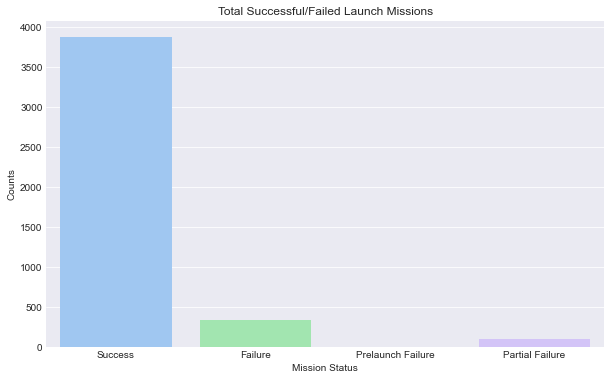

In [201]:
# Rocket launches status
plt.figure(figsize=(10, 6))
fig = sns.countplot(x="Status Mission", data=space_df)
fig.set(title='Total Successful/Failed Launch Missions',
       xlabel = 'Mission Status',
       ylabel = 'Counts');

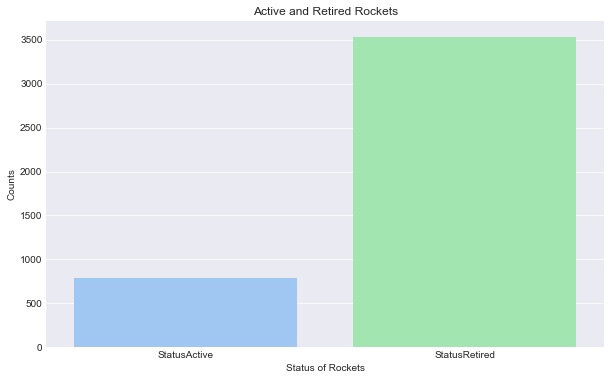

In [212]:
# Status of the rockets
plt.figure(figsize=(10, 6))
fig = sns.countplot(x="Status Rocket", data=space_df)
fig.set(title='Active and Retired Rockets',
       xlabel = 'Status of Rockets',
       ylabel = 'Counts');

## Data Analysis - by Location, Country, Company
This will cover the other details of the dataset with respect to the rocket missions. This will take into account where the rocket was launched, which company manufactured the rockets and the current status of rockets per country. 
* Most rocket missions are carried out by Russia and the United States, with each country totaling almost 1400 rocket launches since 1957. Kazakhstan, France, China, and Japan also have contributed considerably in space exploration.
* Outside of the United States, the two most commonly used space launch facilities are the Baikonur Cosmodrome (Kazakhstan), Plesetsk Cosmodrome (Russia). In the United States, most space launches are done in Florida (Kennedy Space Center and Cape Canaveral AFS) and California (Vandenberg AFB).
* Russia (1303) and the United States (1186) have the most number of successful rocket launches. They are followed by Kazakhstan, France, China and Japan. 
* Currently, China has the most number of active space rockets. It is followed by the United States and France.
* Majority of the rockets that were used for space exploration were manufactured by RVSN USSR. Other notable rocket manufacturers are: SpaceX, NASA, Boeing, General Dynamics.


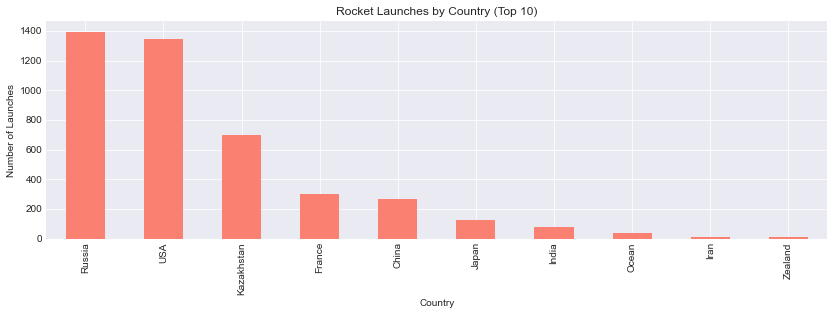

In [166]:
# Top 10 Countries that carried out rocket missions. Russia and the United States are leading the rest of the world in the space race.
plt.style.use('seaborn-darkgrid')
fig = space_df['Country'].value_counts().head(10).plot(kind='bar', x='Country', y='index', figsize=(14,4), color='salmon');
fig.set(title='Rocket Launches by Country (Top 10)',
       xlabel = 'Country',
       ylabel = 'Number of Launches');


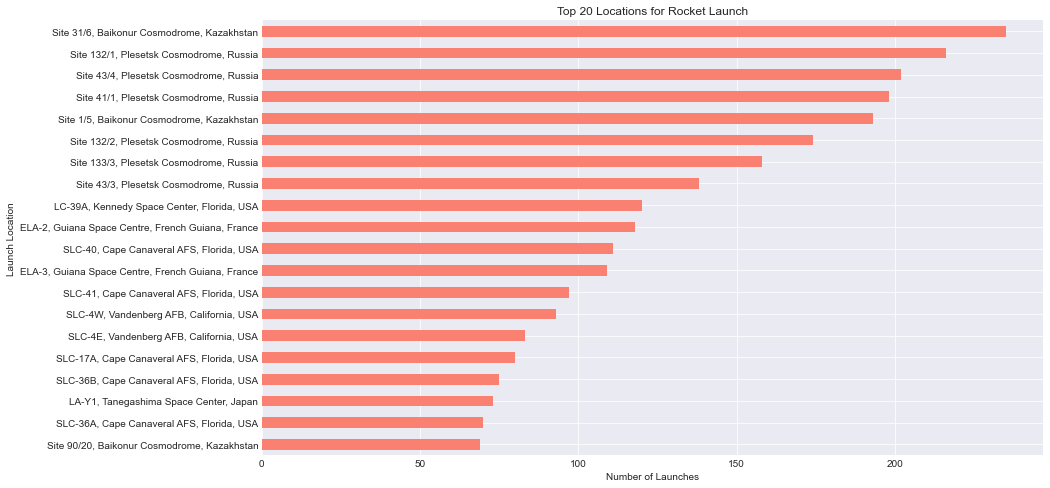

In [167]:
# Rocket Launches by Location (top )

fig = space_df['Location'].value_counts().head(20).plot(kind='barh', x='index', y='Location', figsize=(14,8), color='salmon');
fig.set(title='Top 20 Locations for Rocket Launch',
       xlabel = 'Number of Launches',
       ylabel = 'Launch Location');
fig.invert_yaxis()

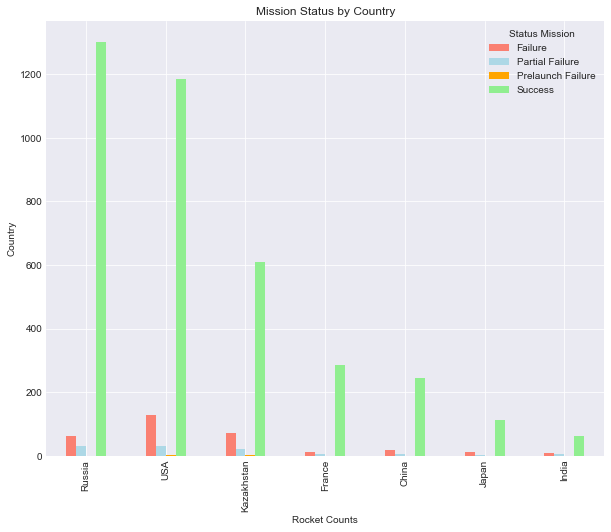

In [214]:
# Rocket Missions
x = pd.crosstab(space_df['Country'], space_df['Status Mission'])
x = x.sort_values(by='Success',ascending=False)
fig = x.head(7).plot(kind='bar', figsize=(10, 8), color=['salmon','lightblue','orange','lightgreen'])
fig.set(title='Mission Status by Country',
       xlabel = 'Rocket Counts',
       ylabel = 'Country');


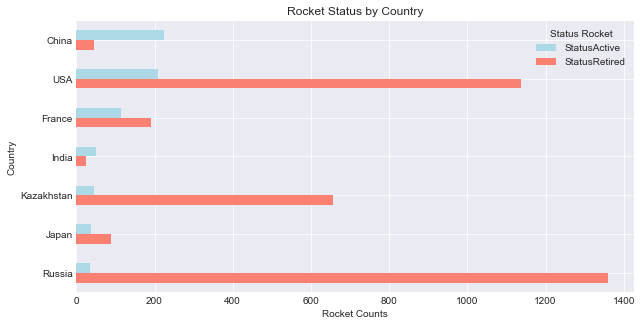

In [224]:
# Active and Retired Rockets by Country
x = pd.crosstab(space_df['Country'], space_df['Status Rocket'])
x = x.sort_values(by='StatusActive',ascending=False)
plt.style.use('seaborn-darkgrid')
fig = x.head(7).plot(kind='barh', figsize=(10, 5), color=['lightblue','salmon'])
fig.set(title='Rocket Status by Country',
       xlabel = 'Rocket Counts',
       ylabel = 'Country');
fig.invert_yaxis()

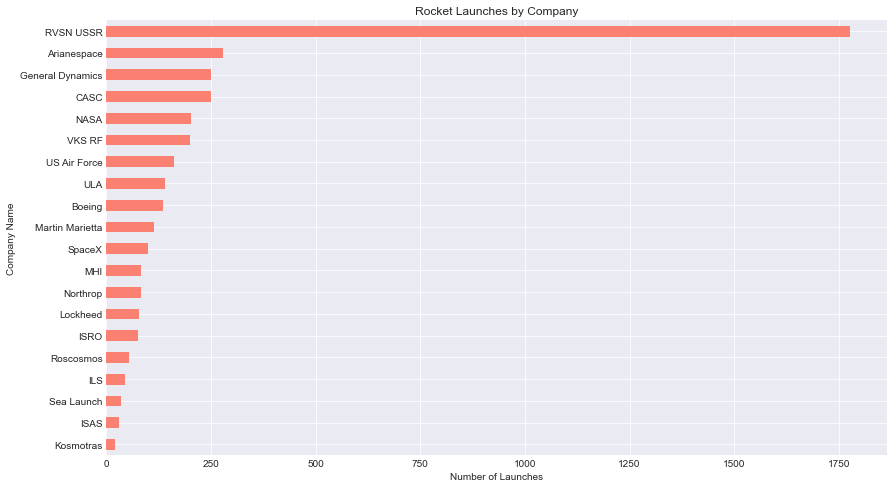

In [217]:
# Rocket launches by companies
fig = space_df['Company Name'].value_counts().head(20).plot(kind='barh', x='index', y='Company', figsize=(14,8), color='salmon');
fig.set(title='Rocket Launches by Company',
       xlabel = 'Number of Launches',
       ylabel = 'Company Name');
fig.invert_yaxis()